Решить систему уравнений

$ \left\{ \begin{gathered} \frac{dy_1}{dx} = -101y_1 + 250y_2 \\ \frac{dy_2}{dx} = 40y_1 - 101y_2 \\ \end{gathered} \right.; \space \left\{ \begin{gathered} y_1(0) = A \\ y_2(0) = B \\ \end{gathered} \right.; 0 < x < D = 1$

11
21
41
81
...
2^n + 1

$\delta = 10^{-6} $

Точное решение

$C_1 = \frac{2A + 5B}{10}; \space \space C_2 = \frac{5B - 2A}{10} $

$y_1(t) = -\frac{5C_1exp(-201x)}{2} + \frac{5C_2exp(-t)}{2} $

$y_2(t) = C_1exp(-201t) + C2exp(-t) $

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
from scipy.integrate import odeint as od

In [19]:
"""
Пользовательские параметры
"""
A = 1
B = 1
D = 1
delta = 1e-6
"""
Параметры задачи 
"""
#Матрица системы
MATR = np.array([[-101, 250],[40, -101]])
# Шаг задачи
h = D/n
#Предыидущая итерация решения
pr = 1
#Текушяя итерация решения
cur = 2
#Костанты точного решения
C1 = (2*A + 5*B) / 10
C2 = (5*B - 2*A) / 10 
#Вектор начальных параметров
y0 = [A, B]
#Вектор количества ршений
n = np.array([11, 21, 41, 81, 81921])






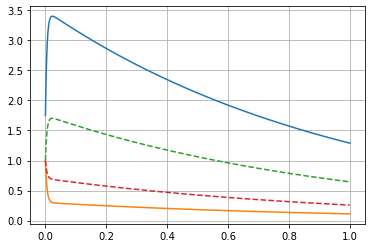

In [20]:
#Точное решение с помощью scipy

def system(y, x):
    y1, y2 = y
    dydx = [-101*y1 + 250*y2, 40*y1 - 101*y2]
    return dydx 

x = np.arange(0, D, 0.001)

def y1_solution(x):
    return od(system, y0, x)

#Аналитическое решение(может не совпадать с вашим)

def anal_sol(x):
    return [(-5 * C1 * np.exp(-201*x))/2 + (5 * C1 * np.exp(-x)),
            (C1 * np.exp(-201 * x)) + (C2 * np.exp(-x))]

fig2 = plt.subplot()
fig2.plot(x, anal_sol(x)[0], )
fig2.plot(x, anal_sol(x)[1])


fig = plt.subplot()
fig.plot(x, y1_solution(x), '--')
plt.grid()


In [18]:
#Метод Эйлера
precise_solution = []
approximate_solurion = []

def iterate(y, h):
    f1 = MATR.dot(y)
    f2 = MATR.dot(y + h*f1)
    y += h*f2
    return y

for hight in h:
    for i in np.arange(0, D, hight):
        while abs(pr - cur) > delta:
            pr = cur
            cur = iterate(pr)
        precise_solution.append(anal_sol(i))


            





[9.09090909e-02 4.76190476e-02 2.43902439e-02 1.23456790e-02
 1.22068822e-05]
[[-101  250]
 [  40 -101]]


NameError: name 'pr' is not defined